In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
import requests
requests.__version__


'2.25.1'

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
#get weather api
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inverell
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | sansepolcro
Processing Record 6 of Set 1 | zelenoborskiy
Processing Record 7 of Set 1 | sibolga
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | rio grande
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hornepayne
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | barbar
City not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | cockburn town
Processing Recor

Processing Record 32 of Set 4 | venice
Processing Record 33 of Set 4 | hervey bay
Processing Record 34 of Set 4 | bonavista
Processing Record 35 of Set 4 | dakar
Processing Record 36 of Set 4 | abu kamal
Processing Record 37 of Set 4 | seguela
Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | mansa
Processing Record 40 of Set 4 | ekibastuz
Processing Record 41 of Set 4 | san quintin
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | sobolevo
Processing Record 48 of Set 4 | burns lake
Processing Record 49 of Set 4 | hoi an
Processing Record 50 of Set 4 | bonthe
Processing Record 1 of Set 5 | chropyne
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | ahumada
City not found. Skipping...
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | ribeira g

Processing Record 21 of Set 8 | ruteng
Processing Record 22 of Set 8 | loreto
Processing Record 23 of Set 8 | talcahuano
Processing Record 24 of Set 8 | namibe
Processing Record 25 of Set 8 | bandarbeyla
Processing Record 26 of Set 8 | arkhara
Processing Record 27 of Set 8 | abapo
Processing Record 28 of Set 8 | kenai
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | manadhoo
Processing Record 32 of Set 8 | wajima
Processing Record 33 of Set 8 | bambous virieux
Processing Record 34 of Set 8 | ravar
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | ovalle
Processing Record 37 of Set 8 | susanville
Processing Record 38 of Set 8 | lisala
Processing Record 39 of Set 8 | katherine
Processing Record 40 of Set 8 | medea
Processing Record 41 of Set 8 | elliot lake
Processing Record 42 of Set 8 | culebra
Processing Record 43 of Set 8 | fort saint james
Processing Record 44 of Set 8 | portland
Processing Reco

Processing Record 13 of Set 12 | onega
Processing Record 14 of Set 12 | silver city
Processing Record 15 of Set 12 | halalo
City not found. Skipping...
Processing Record 16 of Set 12 | honningsvag
Processing Record 17 of Set 12 | maryville
Processing Record 18 of Set 12 | jiangyou
Processing Record 19 of Set 12 | soc trang
Processing Record 20 of Set 12 | yingkou
Processing Record 21 of Set 12 | masingbi
Processing Record 22 of Set 12 | phan thiet
Processing Record 23 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 24 of Set 12 | siwana
Processing Record 25 of Set 12 | yumen
Processing Record 26 of Set 12 | nishihara
Processing Record 27 of Set 12 | tommot
Processing Record 28 of Set 12 | kasama
Processing Record 29 of Set 12 | dolgoderevenskoye
Processing Record 30 of Set 12 | kafanchan
Processing Record 31 of Set 12 | astana
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | beipiao
Processing Record 34 of Set 12 | xuanhua
Processin

In [9]:
len(city_data)

570

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Inverell,-29.7833,151.1167,86.67,40,0,4.00,AU,2021-10-27 02:52:39
1,Bluff,-46.6000,168.3333,58.37,72,58,7.05,NZ,2021-10-27 02:52:40
2,Barrow,71.2906,-156.7887,8.62,78,90,5.75,US,2021-10-27 02:52:40
3,Clyde River,70.4692,-68.5914,23.56,82,100,4.45,CA,2021-10-27 02:52:40
4,Sansepolcro,43.5747,12.1430,53.74,94,80,5.79,IT,2021-10-27 02:52:41
5,Zelenoborskiy,66.8450,32.3622,29.55,91,100,13.69,RU,2021-10-27 02:52:42
6,Sibolga,1.7427,98.7792,81.61,78,61,3.56,ID,2021-10-27 02:52:42
7,Jamestown,42.0970,-79.2353,45.99,96,90,8.01,US,2021-10-27 02:50:02
8,Rio Grande,-32.0350,-52.0986,67.51,81,0,4.65,BR,2021-10-27 02:52:43
9,Bubaque,11.2833,-15.8333,81.97,74,95,8.46,GW,2021-10-27 02:52:43


In [12]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Inverell,AU,2021-10-27 02:52:39,-29.7833,151.1167,86.67,40,0,4.00
1,Bluff,NZ,2021-10-27 02:52:40,-46.6000,168.3333,58.37,72,58,7.05
2,Barrow,US,2021-10-27 02:52:40,71.2906,-156.7887,8.62,78,90,5.75
3,Clyde River,CA,2021-10-27 02:52:40,70.4692,-68.5914,23.56,82,100,4.45
4,Sansepolcro,IT,2021-10-27 02:52:41,43.5747,12.1430,53.74,94,80,5.79
5,Zelenoborskiy,RU,2021-10-27 02:52:42,66.8450,32.3622,29.55,91,100,13.69
6,Sibolga,ID,2021-10-27 02:52:42,1.7427,98.7792,81.61,78,61,3.56
7,Jamestown,US,2021-10-27 02:50:02,42.0970,-79.2353,45.99,96,90,8.01
8,Rio Grande,BR,2021-10-27 02:52:43,-32.0350,-52.0986,67.51,81,0,4.65
9,Bubaque,GW,2021-10-27 02:52:43,11.2833,-15.8333,81.97,74,95,8.46


In [13]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

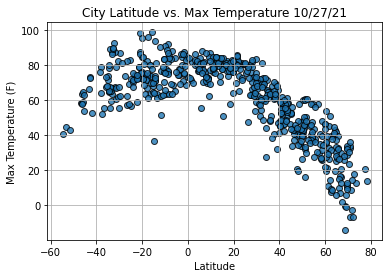

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

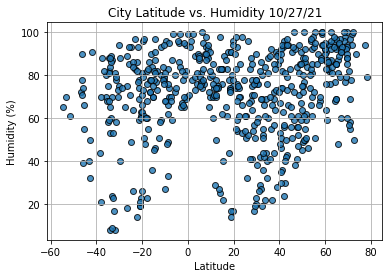

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

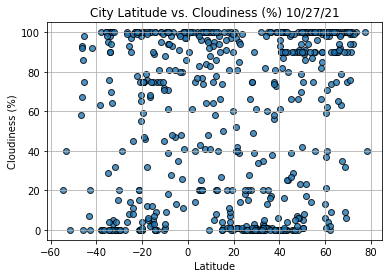

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

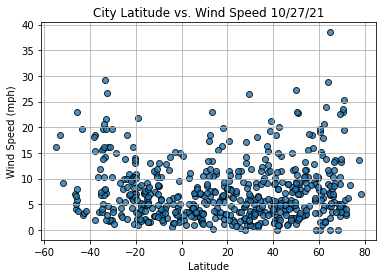

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print(f"R value = {r_value}")
    print(f"P value = {p_value}")

In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

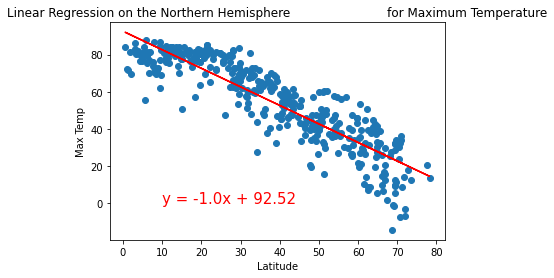

R value = -0.8859043095318953
P value = 1.671459289747573e-130


In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

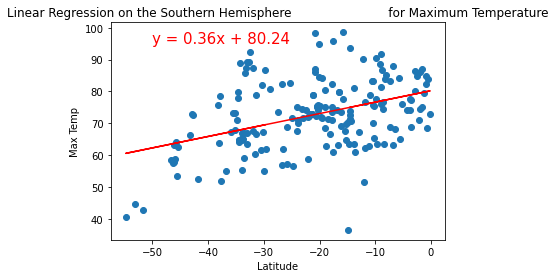

R value = 0.41545804670316805
P value = 4.968808280934392e-09


In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,95))

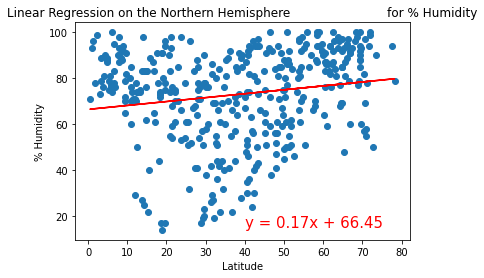

R value = 0.1705394478567447
P value = 0.0007550607911131969


In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,15))

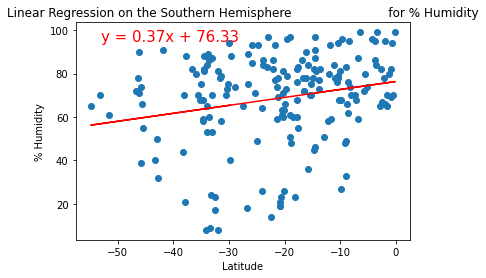

R value = 0.21998447921199915
P value = 0.002769328899725494


In [78]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-53,95))

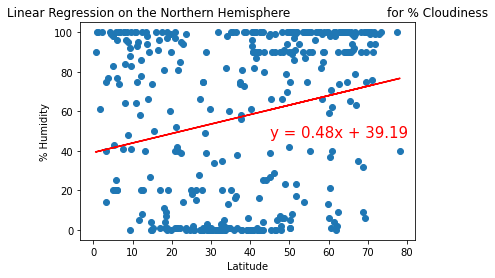

R value = 0.233666164091374
P value = 3.3783947658054323e-06


In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(45,47))

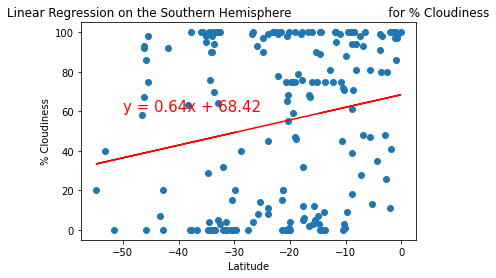

R value = 0.20044418281126652
P value = 0.00651544836216945


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

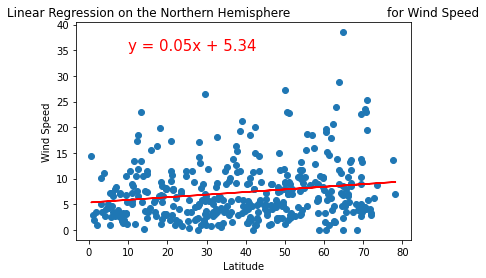

R value = 0.18289064056410295
P value = 0.00029827261233137097


In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,35))

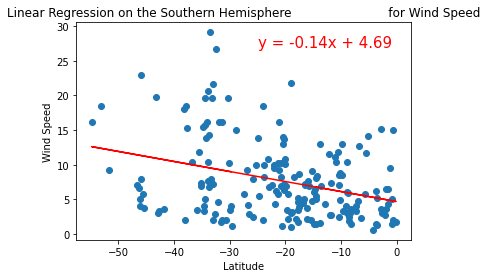

R value = -0.3302431299700689
P value = 4.981060538920089e-06


In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,27))